<a href="https://colab.research.google.com/github/eric-castillo05/emotions-wheel-nlp/blob/main/unilabel/TF_IDF_lreg_spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import polars as pl
import numpy as np

In [27]:
df_train = pl.read_csv('/content/train_translated.csv')
df_test = pl.read_csv('/content/train_translated.csv')

In [28]:
df_train

id,texto,emocion,texto_en2esp_marian
i64,str,str,str
1,"""i didnt feel humiliated""","""sadness""","""No me sentí humillada."""
2,"""i can go from feeling so hopel…","""sadness""","""Puedo pasar de sentirme tan de…"
3,"""im grabbing a minute to post i…","""anger""","""Estoy agarrando un minuto para…"
4,"""i am ever feeling nostalgic ab…","""love""","""Me siento nostálgico sobre la …"
5,"""i am feeling grouchy""","""anger""","""Me siento gruñón."""
…,…,…,…
15996,"""i just had a very brief time i…","""sadness""","""Acabo de tener un tiempo muy b…"
15997,"""i am now turning and i feel pa…","""sadness""","""Ahora estoy girando y me sient…"
15998,"""i feel strong and good overall""","""joy""","""Me siento fuerte y bien en gen…"


In [29]:
df_test

id,texto,emocion,texto_en2esp_marian
i64,str,str,str
1,"""i didnt feel humiliated""","""sadness""","""No me sentí humillada."""
2,"""i can go from feeling so hopel…","""sadness""","""Puedo pasar de sentirme tan de…"
3,"""im grabbing a minute to post i…","""anger""","""Estoy agarrando un minuto para…"
4,"""i am ever feeling nostalgic ab…","""love""","""Me siento nostálgico sobre la …"
5,"""i am feeling grouchy""","""anger""","""Me siento gruñón."""
…,…,…,…
15996,"""i just had a very brief time i…","""sadness""","""Acabo de tener un tiempo muy b…"
15997,"""i am now turning and i feel pa…","""sadness""","""Ahora estoy girando y me sient…"
15998,"""i feel strong and good overall""","""joy""","""Me siento fuerte y bien en gen…"


In [30]:
df_train = df_train.rename({
    'emocion': 'label',
    'texto_en2esp_marian': 'text'
})
df_train = df_train.drop(['texto', 'id'])


df_test = df_test.rename({
    'emocion': 'label',
    'texto_en2esp_marian': 'text'
})
df_test = df_test.drop(['texto', 'id'])

In [31]:
df_train

label,text
str,str
"""sadness""","""No me sentí humillada."""
"""sadness""","""Puedo pasar de sentirme tan de…"
"""anger""","""Estoy agarrando un minuto para…"
"""love""","""Me siento nostálgico sobre la …"
"""anger""","""Me siento gruñón."""
…,…
"""sadness""","""Acabo de tener un tiempo muy b…"
"""sadness""","""Ahora estoy girando y me sient…"
"""joy""","""Me siento fuerte y bien en gen…"


In [32]:
df_test

label,text
str,str
"""sadness""","""No me sentí humillada."""
"""sadness""","""Puedo pasar de sentirme tan de…"
"""anger""","""Estoy agarrando un minuto para…"
"""love""","""Me siento nostálgico sobre la …"
"""anger""","""Me siento gruñón."""
…,…
"""sadness""","""Acabo de tener un tiempo muy b…"
"""sadness""","""Ahora estoy girando y me sient…"
"""joy""","""Me siento fuerte y bien en gen…"


In [38]:
import re
import nltk
from nltk.corpus import stopwords
import string
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import normalize
import spacy

In [48]:
def remove_vowels_accents(sentence):
        sentence = re.sub(r"[áàäâ]", "a", sentence)
        sentence = re.sub(r"[éèëê]", "e", sentence)
        sentence = re.sub(r"[íìïî]", "i", sentence)
        sentence = re.sub(r"[óòöô]", "o", sentence)
        sentence = re.sub(r"[úùüû]", "u", sentence)
        sentence = re.sub(r"[ÁÀÄÂ]", "A", sentence)
        sentence = re.sub(r"[ÉÈËÊ]", "E", sentence)
        sentence = re.sub(r"[ÍÌÏÎ]", "I", sentence)
        sentence = re.sub(r"[ÓÒÖÔ]", "O", sentence)
        sentence = re.sub(r"[ÚÙÜÛ]", "U", sentence)
        return sentence

def remove_unprintable(sentence):
      printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
      sentence = "".join(filter(lambda x: x in printable, sentence))
      return sentence

def removePunctuation(sentence):
    sentence = re.sub(r'[?|¿|¡|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.strip()
    sentence = sentence.replace("\n"," ")
    return sentence

def removeNumber(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in sentence.split() if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
nlp = spacy.load("es_core_news_lg", disable=["parser", "ner"])

In [49]:
def spacy_embeddings(texts):
    texts_processed = [remove_vowels_accents(t) for t in texts]
    texts_processed = [remove_unprintable(t) for t in texts]
    docs = list(nlp.pipe(texts_processed, batch_size=50))
    vectors = np.array([doc.vector for doc in docs])
    return normalize(vectors, norm='l2')

In [50]:
def custom_preprocess(text):
    text = remove_vowels_accents(text)
    text = removePunctuation(text)
    text = remove_unprintable(text)
    text = removeNumber(text)
    text = removeStopWords(text)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    return ' '.join(lemmas)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
feature_union = FeatureUnion([
    ("tfidf", TfidfVectorizer(
        preprocessor=custom_preprocess,
        ngram_range=(1, 2),
        max_features=8000,
        norm="l2"
    )),
    ("embeddings", FunctionTransformer(
        spacy_embeddings,
        validate=False
    ))
])

In [55]:
X_train, y_train = df_train.select('text').to_series().to_list(), df_train.select('label').to_series().to_list()
X_test, y_test = df_test.select('text').to_series().to_list(), df_test.select('label').to_series().to_list()

In [56]:
X_train

['No me sentí humillada.',
 'Puedo pasar de sentirme tan desesperanzada a tan maldita esperanzada de estar cerca de alguien que se preocupa y está despierto.',
 'Estoy agarrando un minuto para publicar Me siento codicioso mal',
 'Me siento nostálgico sobre la chimenea. Sabré que todavía está en la propiedad.',
 'Me siento gruñón.',
 'He estado sintiéndome un poco agobiado últimamente no estaba seguro de por qué era',
 'He estado tomando o miligramos o veces la cantidad recomendada y me he quedado dormido mucho más rápido, pero también me siento tan divertido',
 'Me siento tan confundido sobre la vida como un adolescente o tan cansado como un hombre de un año',
 'He estado con petronas por años siento que petronas ha funcionado bien y ha hecho un gran beneficio',
 'Yo también me siento romántico.',
 'Siento que tengo que hacer que el sufrimiento que estoy viendo signifique algo.',
 'Siento que correr es una experiencia divina y que puedo esperar tener algún tipo de encuentro espiritual'

In [59]:
X_train = feature_union.fit_transform(X_train)
X_test = feature_union.transform(X_test)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [65]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

In [66]:
lreg = LogisticRegression(max_iter = 1000)

In [68]:
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred = lreg.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2159
           1       0.93      0.83      0.88      1937
           2       0.87      0.97      0.91      5362
           3       0.92      0.70      0.79      1304
           4       0.89      0.95      0.92      4666
           5       0.92      0.60      0.73       572

    accuracy                           0.89     16000
   macro avg       0.91      0.82      0.85     16000
weighted avg       0.90      0.89      0.89     16000



In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

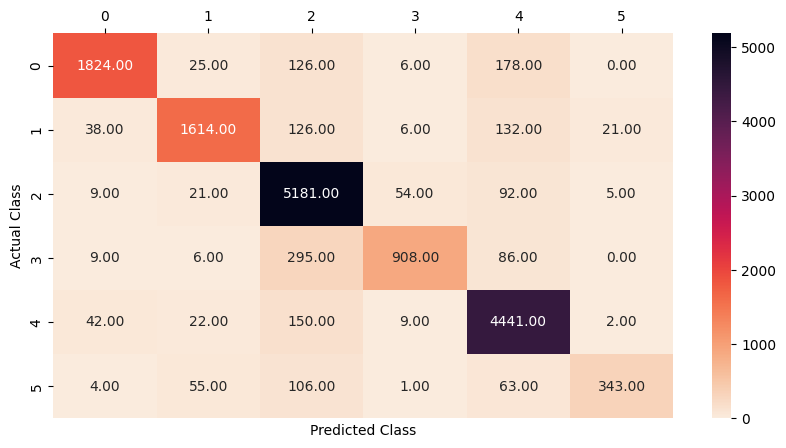

In [73]:
plt.figure(figsize = (10, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'rocket_r', fmt = '.2f', annot = True)
ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
ax.xaxis.tick_top()
plt.savefig('confusion_matrix.png', dpi = 400)
plt.show()

In [74]:
from sklearn.metrics import roc_curve, auc

In [77]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))

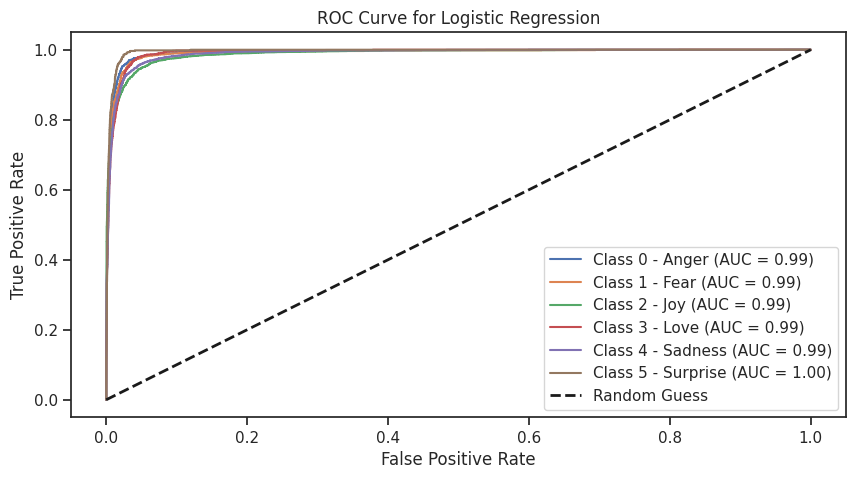

In [78]:
fpr = {}
tpr = {}
roc_auc = {}
sns.set_theme(style = 'ticks')

y_score = lreg.predict_proba(X_test)
n_classes = len(lreg.classes_)

plt.figure(figsize = (10, 5))

for i in range(n_classes):
  y_true_binary = (y_test == i).astype(int)
  y_score_binary = y_score[:, i]

  fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_score_binary)
  roc_auc[i] = auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], label = f'Class {i} - {list(label_map.keys())[i].title()} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw =  2, label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc = 'lower right')
plt.savefig('ROC_Curve-TF-IDF.png', dpi = 400)
plt.show()